In [6]:
import pandas as pd

df = pd.read_csv('ryanair_reviews.csv')

df = df[['Comment', 'Seat Comfort', 'Value For Money', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Recommended']]

df_cleaned = df.dropna()

In [23]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv('ryanair_reviews.csv')
comments = data['Comment']

def preprocess(text):
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text.lower())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

processed_comments = [preprocess(comment) for comment in comments]

dictionary = corpora.Dictionary(processed_comments)

corpus = [dictionary.doc2bow(comment) for comment in processed_comments]

num_topics = 3
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

print("Topics and their keywords:")
for topic_id, topic_keywords in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {topic_keywords}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topics and their keywords:
Topic 1: 0.023*"flight" + 0.017*"ryanair" + 0.009*"boarding" + 0.009*"airport" + 0.009*"check" + 0.008*"u" + 0.008*"pay" + 0.007*"get" + 0.007*"would" + 0.007*"seat"
Topic 2: 0.031*"flight" + 0.024*"ryanair" + 0.019*"time" + 0.012*"seat" + 0.009*"crew" + 0.008*"boarding" + 0.008*"staff" + 0.007*"good" + 0.007*"cabin" + 0.006*"airline"
Topic 3: 0.016*"bag" + 0.010*"seat" + 0.010*"luggage" + 0.009*"ryanair" + 0.008*"would" + 0.007*"case" + 0.007*"take" + 0.006*"flight" + 0.006*"put" + 0.006*"cabin"


Top words for each topic:
Topic 1:
restocked ruin pescara pleasurable distinct blatant leary mouse precautions catalogue
Topic 2:
la que test stag scams loyal por appalled rochelle gbp
Topic 3:
svq palmas las allergy registration gift disconnected nut sector sizer
Topic 4:
random edi infant aviv tel exist force couples unfounded brother
Topic 5:
flight ryanair time check boarding staff airline pay airport crew


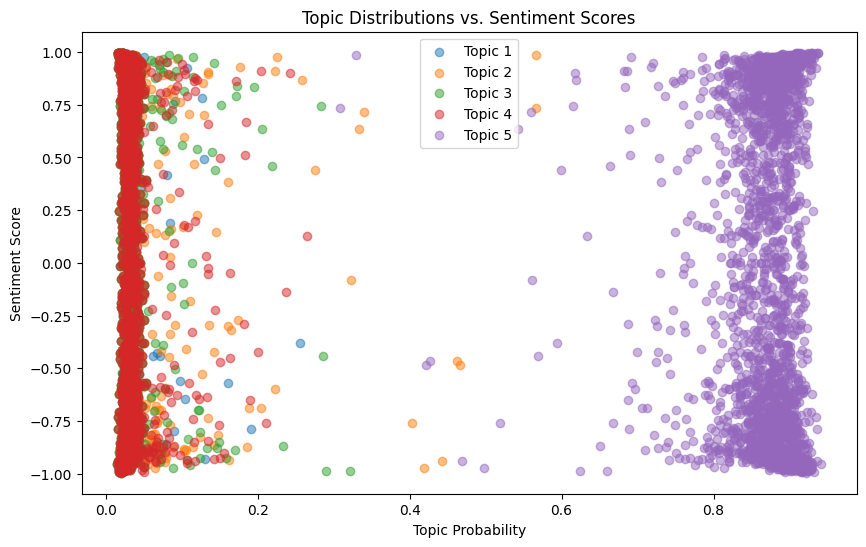

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('ryanair_reviews.csv')
data = data[['Comment', 'Recommended']]

sentiment_analyzer = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Comment'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(data['Comment'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

topic_distributions = lda.transform(tfidf)

import numpy as np

feature_names = vectorizer.get_feature_names_out()

topics = lda.components_

n_top_words = 10

print("Top words for each topic:")
for topic_idx, topic in enumerate(topics):
    print(f"Topic {topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(" ".join(top_words))

plt.figure(figsize=(10, 6))
for i in range(topic_distributions.shape[1]):
    plt.scatter(topic_distributions[:, i], data['Sentiment_Score'], label=f'Topic {i+1}', alpha=0.5)

plt.xlabel('Topic Probability')
plt.ylabel('Sentiment Score')
plt.title('Topic Distributions vs. Sentiment Scores')
plt.legend()
plt.show()


In the graph representing the LDA topic modeling results, the probability values represent the likelihood of each topic being associated with a particular comment. Each comment is a mixture of topics, and the probability values indicate the strength of association between each topic and the comment. Higher probability values indicate a stronger association between the comment and the corresponding topic.

In [4]:
import pandas as pd

df_cleaned['Recommended'] = df_cleaned['Recommended'].map({'yes': 1, 'no': 0})

correlation_matrix = df_cleaned[['Recommended', 'Seat Comfort', 'Value For Money', 'Cabin Staff Service', 'Ground Service', 'Food & Beverages']].corr()

print(correlation_matrix)

                     Recommended  Seat Comfort  Value For Money  \
Recommended             1.000000      0.691231         0.849823   
Seat Comfort            0.691231      1.000000         0.699106   
Value For Money         0.849823      0.699106         1.000000   
Cabin Staff Service     0.745831      0.711706         0.751177   
Ground Service          0.815067      0.667227         0.806648   
Food & Beverages        0.713051      0.696909         0.707464   

                     Cabin Staff Service  Ground Service  Food & Beverages  
Recommended                     0.745831        0.815067          0.713051  
Seat Comfort                    0.711706        0.667227          0.696909  
Value For Money                 0.751177        0.806648          0.707464  
Cabin Staff Service             1.000000        0.743483          0.772136  
Ground Service                  0.743483        1.000000          0.688875  
Food & Beverages                0.772136        0.688875          1.

<ipython-input-4-becb6cf9abef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Recommended'] = df_cleaned['Recommended'].map({'yes': 1, 'no': 0})


Here I mapped the 'Recommended' column in the dataframe in to numerical values (1 for 'yes' and 0 for 'no')
Then I created a correlation matrix function for each respective feature, I mainly just wanted to see how strongly correlated each feature was with the Recommended column

In [28]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

data = pd.read_csv('ryanair_reviews.csv')
data = data[['Comment', 'Seat Comfort', 'Value For Money', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Recommended']]

analyzer = SentimentIntensityAnalyzer()

data['Sentiment_Score'] = data['Comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
average_sentiments = data.groupby(['Seat Comfort', 'Value For Money', 'Ground Service', 'Food & Beverages', 'Cabin Staff Service']).agg({'Sentiment_Score': 'mean'})


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_df['Comment'])
test_vectors = vectorizer.transform(test_df['Comment'])

positive_model = LogisticRegression()
positive_model.fit(train_vectors, train_df['Recommended'] == 'yes')

negative_model = LogisticRegression()
negative_model.fit(train_vectors, train_df['Recommended'] == 'no')

positive_predictions = positive_model.predict(test_vectors)
negative_predictions = negative_model.predict(test_vectors)

positive_accuracy = accuracy_score(test_df['Recommended'] == 'yes', positive_predictions)
negative_accuracy = accuracy_score(test_df['Recommended'] == 'no', negative_predictions)

positive_recommendation = test_df[positive_predictions]['Recommended'].value_counts(normalize=True)
negative_recommendation = test_df[negative_predictions]['Recommended'].value_counts(normalize=True)


print(f"Model Accuracy: {positive_accuracy}")


print("Negative:", negative_recommendation)
print("Positive:", positive_recommendation)

Model Accuracy: 0.9155555555555556
Negative: Recommended
no     0.910891
yes    0.089109
Name: proportion, dtype: float64
Positive: Recommended
yes    0.92517
no     0.07483
Name: proportion, dtype: float64


In [30]:
from sklearn.metrics import classification_report

print("Positive Classification Report:")
print(classification_report(test_df['Recommended'] == 'yes', positive_predictions))

print("Negative Classification Report:")
print(classification_report(test_df['Recommended'] == 'no', negative_predictions))

Positive Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94       287
        True       0.93      0.83      0.88       163

    accuracy                           0.92       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.92      0.92      0.91       450

Negative Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.83      0.88       163
        True       0.91      0.96      0.94       287

    accuracy                           0.92       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.92      0.92      0.91       450



For the code above I did:
1. Data Splitting: 80% Training and 20% testing sets using the train_test_split.
2. Text Vectorization: Vectorized the "Comment" feature using TfidfVectorizer.
3. Model Training: Two logistic regression models are trained to predict positive and negative sentiment based on the text vectors.
4. Model Evaluation: The accuracy of the models is evaluated using accuracy_score from sklearn.metrics.
5. Recommendation Analysis: The code also analyzes the recommendation distribution for both positive and negative sentiments based on the model predictions.


Here I calculated sentiment scores for each comment using lambda function, and with those scores I grouped the data by the different features like seat comfort, value for money, etc., and calculated the average sentiment score for each group.
For the graphs below, pretty good visual you can see how each feature lines up with the comment's sentiment score. The highest correlation, Value For Money, sentiment only has ratings of 3/4/5 in the higher sentiment score values. The weaker correlations you can see have some ratings of 1 and 2 at the higher sentiment scores, proving that even though that feature had a low rating, the overall review could have been positive

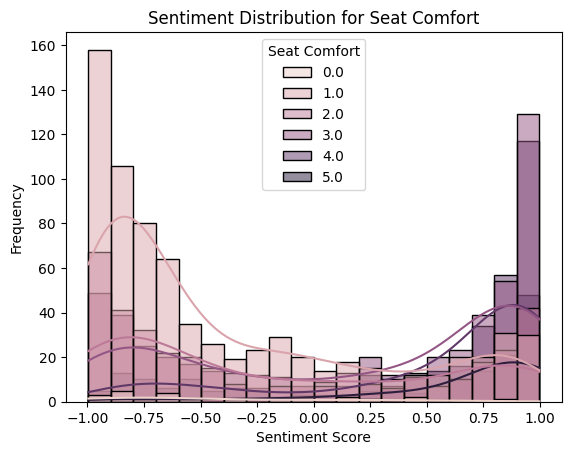

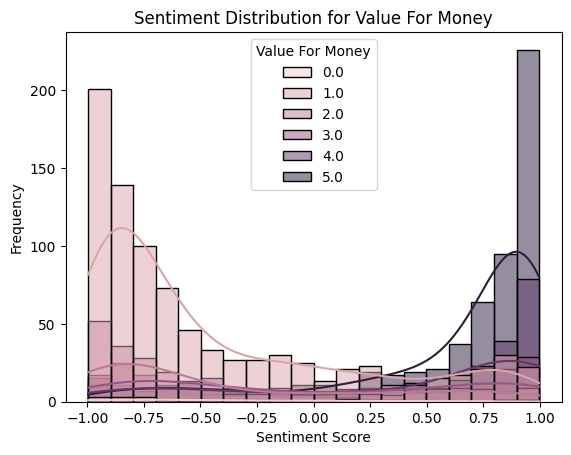

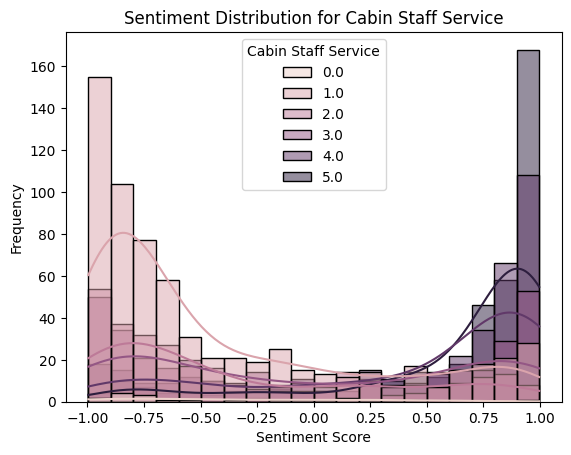

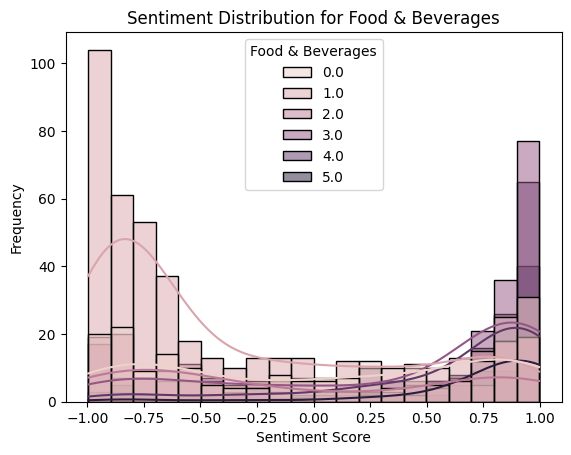

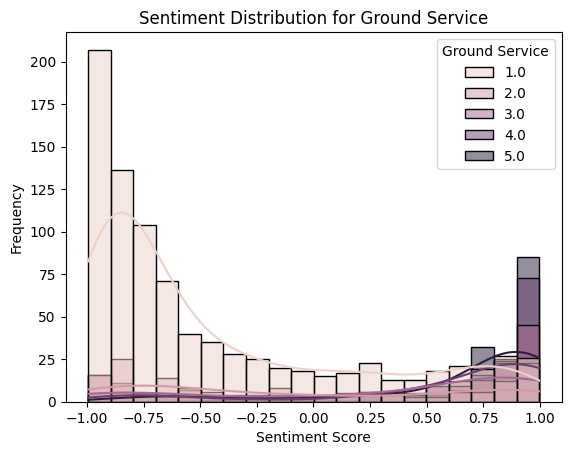

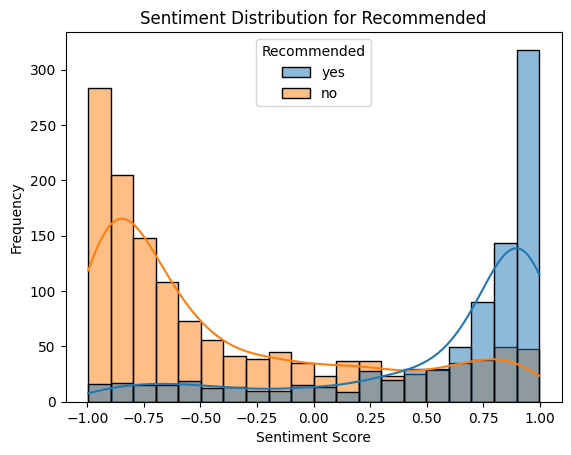

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in data.columns[1:-1]:
    sns.histplot(data=data, x='Sentiment_Score', hue=feature, kde=True, bins=20)
    plt.title(f'Sentiment Distribution for {feature}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


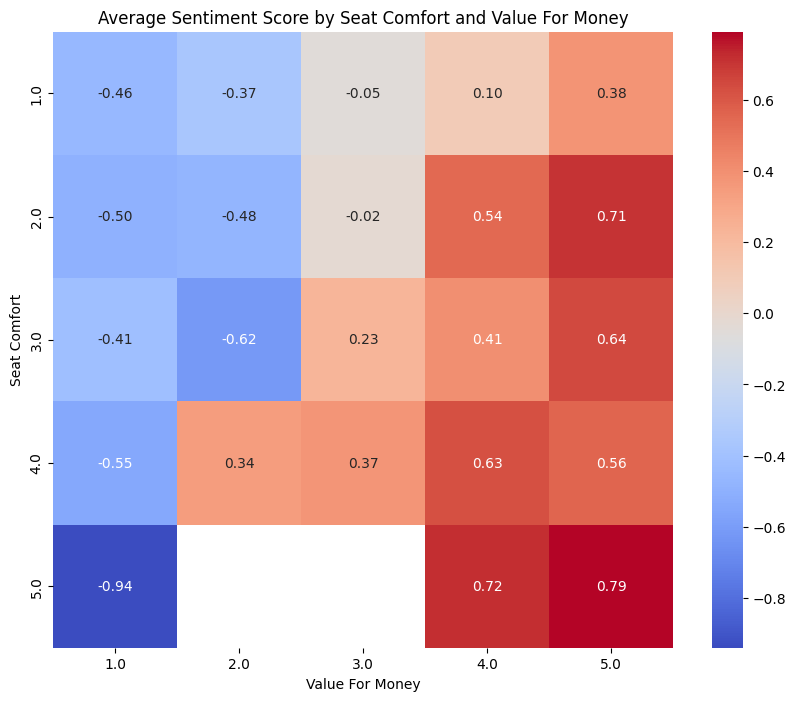

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

data = pd.read_csv('ryanair_reviews.csv')
data = data[['Comment', 'Seat Comfort', 'Value For Money', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Recommended']]

analyzer = SentimentIntensityAnalyzer()

data['Sentiment_Score'] = data['Comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

average_sentiments = data.groupby(['Seat Comfort', 'Value For Money', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']).agg({'Sentiment_Score': 'mean'}).reset_index()

heatmap_data = average_sentiments.pivot_table(index='Seat Comfort', columns='Value For Money', values='Sentiment_Score', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(data=heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Sentiment Score by Seat Comfort and Value For Money')
plt.xlabel('Value For Money')
plt.ylabel('Seat Comfort')
plt.show()



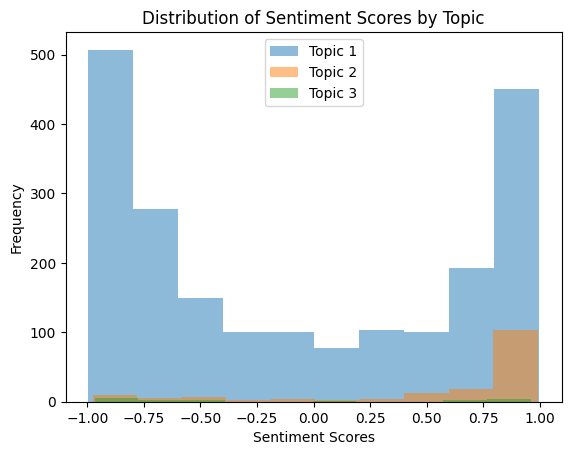

In [33]:
sentiment_scores = data['Sentiment_Score']

for i in range(num_topics):
    topic_sentiments = [sentiment_scores[j] for j in range(len(processed_comments)) if lda_model[corpus[j]][0][0] == i]
    plt.hist(topic_sentiments, bins=10, alpha=0.5, label=f'Topic {i+1}')

plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores by Topic')
plt.legend()
plt.show()

In [9]:

data['Recommended'] = data['Recommended'].map({'yes': 1, 'no': 0})

correlation_coefficients = data[['Sentiment_Score', 'Recommended']].corr().iloc[:-1, -1]


Accuracy using Random Forest Classifier: 0.9496402877697842


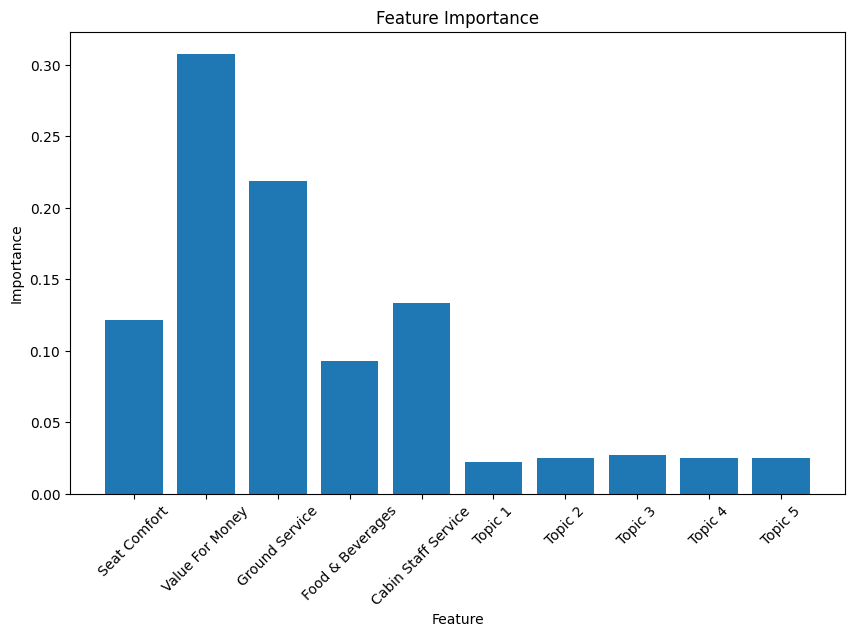

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('ryanair_reviews.csv')
data = data[['Comment', 'Seat Comfort', 'Value For Money', 'Ground Service', 'Food & Beverages', 'Cabin Staff Service', 'Recommended']]

data.dropna(inplace=True)

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(data['Comment'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

topic_distributions = lda.transform(tfidf)

for i in range(topic_distributions.shape[1]):
    data[f'Topic {i+1}'] = topic_distributions[:, i]

X = data.drop(['Comment', 'Recommended'], axis=1)
y = data['Recommended']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random Forest Classifier:", accuracy)

feature_importance = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


For this code, I did topic Modeling and trained a Random Forest Classifier for feature importance.
First using LDA to extract topic distributions from the TF-IDF matrix, then adding those features to the dataset.

Aplitting the data into training and testing sets, I trained a Random Forest Classifier that will be predicting the recommendation answer based on the features.
Lastly, I did feature importance and visualized it to show which feature had more of an influence on the outcome recommendation.

In [4]:
def get_top_words(lda_model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

feature_names = vectorizer.get_feature_names_out()

n_top_words = 10

top_words_per_topic = get_top_words(lda, feature_names, n_top_words)

for topic, words in top_words_per_topic.items():
    print(f"Topic {topic + 1}:")
    print(", ".join(words))
    print()



Topic 1:
flight, ryanair, time, check, airline, pay, boarding, staff, service, crew

Topic 2:
visa, vibe, compare, stamped, stamp, students, teachers, chinese, turns, oversize

Topic 3:
welcome, apparent, shady, direction, bright, gum, 07, stories, 340, cardiff

Topic 4:
registration, names, poland, vienna, commend, 115, engine, 6am, modlin, crazy

Topic 5:
amsterdam, crazy, fes, dollar, public, zadar, trieste, bari, frustration, shut

